### Create a Search Routine

Now that we have turbo_seti installed and the data downloaded, we can start a Doppler drift search.
First we want to create a search object using turbo_seti.find_doppler.find_doppler.FindDoppler()

Note that this tutorial is simpler than the second one.  As such, this is a good starter kit for daily scientific work.

In [7]:
import os
import time
from pathlib import Path
from turbo_seti.find_doppler.find_doppler import FindDoppler

DATADIR = str(Path.home()) + "/turbo_seti_data/"

In [8]:
# Get rid of any pre-existing output files from a prior run.
for x_file in sorted(os.listdir(DATADIR)):
    x_type = x_file.split('.')[-1]
    if x_type != 'h5':
        os.remove(DATADIR + x_file)

# Get ready for search by instantiating the doppler object.
doppler = FindDoppler(DATADIR + 'single_coarse_guppi_59046_80036_DIAG_VOYAGER-1_0011.rawspec.0000.h5',
                      max_drift = 4,
                      snr = 10,       
                      out_dir = DATADIR # This is where the turboSETI output files will be stored.
                     )
print("\ntutorial_1: FindDoppler object was instantiated.")


turbo_seti version 2.1.16
blimpy version 2.0.31
h5py version 3.5.0


tutorial_1: FindDoppler object was instantiated.


Now we run the search routine on the spectra contained in this single HDF5 file:

In [9]:
t1 = time.time()
doppler.search()
print("\ntutorial_1: Search complete, et = {:.1f} seconds.".format(time.time() - t1))

HDF5 header info: {'DIMENSION_LABELS': array(['time', 'feed_id', 'frequency'], dtype=object), 'az_start': 0.0, 'data_type': 1, 'fch1': 8421.38671875, 'foff': -2.7939677238464355e-06, 'machine_id': 20, 'nbits': 32, 'nchans': 1048576, 'nifs': 1, 'source_name': 'VOYAGER-1', 'src_dej': <Angle 12.40378167 deg>, 'src_raj': <Angle 17.21124472 hourangle>, 'telescope_id': 6, 'tsamp': 18.253611007999982, 'tstart': 59046.92634259259, 'za_start': 0.0}

Starting ET search with parameters: datafile=/home/elkins/turbo_seti_data/single_coarse_guppi_59046_80036_DIAG_VOYAGER-1_0011.rawspec.0000.h5, max_drift=4, min_drift=1e-05, snr=10, out_dir=/home/elkins/turbo_seti_data/, coarse_chans=None, flagging=False, n_coarse_chan=1, kernels=None, gpu_id=0, gpu_backend=False, blank_dc=True, precision=1, append_output=False, log_level_int=20, obs_info={'pulsar': 0, 'pulsar_found': 0, 'pulsar_dm': 0.0, 'pulsar_snr': 0.0, 'pulsar_stats': array([0., 0., 0., 0., 0., 0.]), 'RFI_level': 0.0, 'Mean_SEFD': 0.0, 'psrflux_

Please wait for the "Search complete" message.

## Finding and Plotting Events
Now let's run the executable `turboSETI` on all of the HDF5 files from the same observation so we can find interesting events (a hit that occurs across multiple files) via the [ON/OFF method](https://github.com/UCBerkeleySETI/breakthrough/blob/master/GBT/README.md).

Normally it takes a chunk of time to run the algorithm on all of the files, so here is a little script that keeps `turboSETI` running in the background if executed in a tmux session:

In [10]:
# %load example_script.py
import glob

# glob will create a list of specific files in a directory. In this case, any file ending in .h5.
h5list = sorted(glob.glob(DATADIR + '*.h5'))

# Get rid of any pre-existing output files from a prior run.
for x_file in sorted(os.listdir(DATADIR)):
    x_type = x_file.split('.')[-1]
    if x_type != 'h5':
        os.remove(DATADIR + x_file)

# Iterate over the 6 HDF5 files
print("tutorial_1: Please wait for the \"End\" message,\n")
for file in h5list:
    # Execute turboSETI in the terminal
    console = 'turboSETI ' + file + ' -M 4 -s 10 -o ' + DATADIR
    os.system(console)

print("\ntutorial_1: All HDF5 files have been successfully processed.")
print("tutorial_1: End.")


tutorial_1: Please wait for the "End" message,


turbo_seti version 2.1.16
blimpy version 2.0.31
h5py version 3.5.0

HDF5 header info: {'DIMENSION_LABELS': array(['time', 'feed_id', 'frequency'], dtype=object), 'az_start': 0.0, 'data_type': 1, 'fch1': 8421.38671875, 'foff': -2.7939677238464355e-06, 'machine_id': 20, 'nbits': 32, 'nchans': 1048576, 'nifs': 1, 'source_name': 'VOYAGER-1', 'src_dej': <Angle 12.40378167 deg>, 'src_raj': <Angle 17.21124472 hourangle>, 'telescope_id': 6, 'tsamp': 18.253611007999982, 'tstart': 59046.92634259259, 'za_start': 0.0}

Starting ET search with parameters: datafile=/home/elkins/turbo_seti_data/single_coarse_guppi_59046_80036_DIAG_VOYAGER-1_0011.rawspec.0000.h5, max_drift=4.0, min_drift=1e-05, snr=10.0, out_dir=/home/elkins/turbo_seti_data/, coarse_chans=, flagging=False, n_coarse_chan=1, kernels=None, gpu_id=0, gpu_backend=False, blank_dc=True, precision=1, append_output=False, log_level_int=20, obs_info={'pulsar': 0, 'pulsar_found': 0, 'pulsar_dm': 0

Search time:  0.01 min

tutorial_1: All HDF5 files have been successfully processed.
tutorial_1: End.


Please wait for the "All HDF5 files have been successfully processed" and "End" messages.

Now that we have ran `turboSETI` on six observations, let's use `plotSETI` to find and plot events that only exist in the ON observations (on-target). 

It is important to consider the value to use for the filter_threshold. Here is a docstring explaining what filter threshold is:
```
filter_threshold        Specification for how strict the hit filtering will be.
                        There are 3 different levels of filtering, specified by
                        the integers 1, 2, and 3. 
                        
                        Filter_threshold = 1 returns hits above an SNR cut, taking into account the
                        check_zero_drift parameter, but without an ON-OFF check.
                        
                        Filter_threshold = 2 returns hits that passed level 1
                        AND that are in at least one ON but no OFFs. 
                        
                        Filter_threshold = 3 returns events that passed level 2
                        AND that are present in *ALL* ONs.
```

In [13]:
print("tutorial_1: Please wait for the \"End\" message,\n")
console = "plotSETI -f 3 -o " + DATADIR + " " + DATADIR
os.system(console)
print("\ntutorial_1: All PNG files have been generated.")
print("tutorial_1: End.")


tutorial_1: Please wait for the "End" message,


************   BEGINNING FIND_EVENT PIPELINE   **************

Assuming the first observation is an ON
find_event_pipeline INFO     find_event_pipeline: file=single_coarse_guppi_59046_80036_DIAG_VOYAGER-1_0011.rawspec.0000.dat, tstart=59046.92634259259, source_name=VOYAGER-1, fch1=8421.38671875, foff=-2.7939677238464355e-06, nchans=1048576
find_event_pipeline INFO     find_event_pipeline: file=single_coarse_guppi_59046_80354_DIAG_VOYAGER-1_0012.rawspec.0000.dat, tstart=59046.93002314815, source_name=VOYAGER-1, fch1=8421.38671875, foff=-2.7939677238464355e-06, nchans=1048576
find_event_pipeline INFO     find_event_pipeline: file=single_coarse_guppi_59046_80672_DIAG_VOYAGER-1_0013.rawspec.0000.dat, tstart=59046.933703703704, source_name=VOYAGER-1, fch1=8421.38671875, foff=-2.7939677238464355e-06, nchans=1048576
find_event_pipeline INFO     find_event_pipeline: file=single_coarse_guppi_59046_80989_DIAG_VOYAGER-1_0014.rawspec.0000.dat, tstar

Great! Now we can have a look at the waterfall plot PNG files.

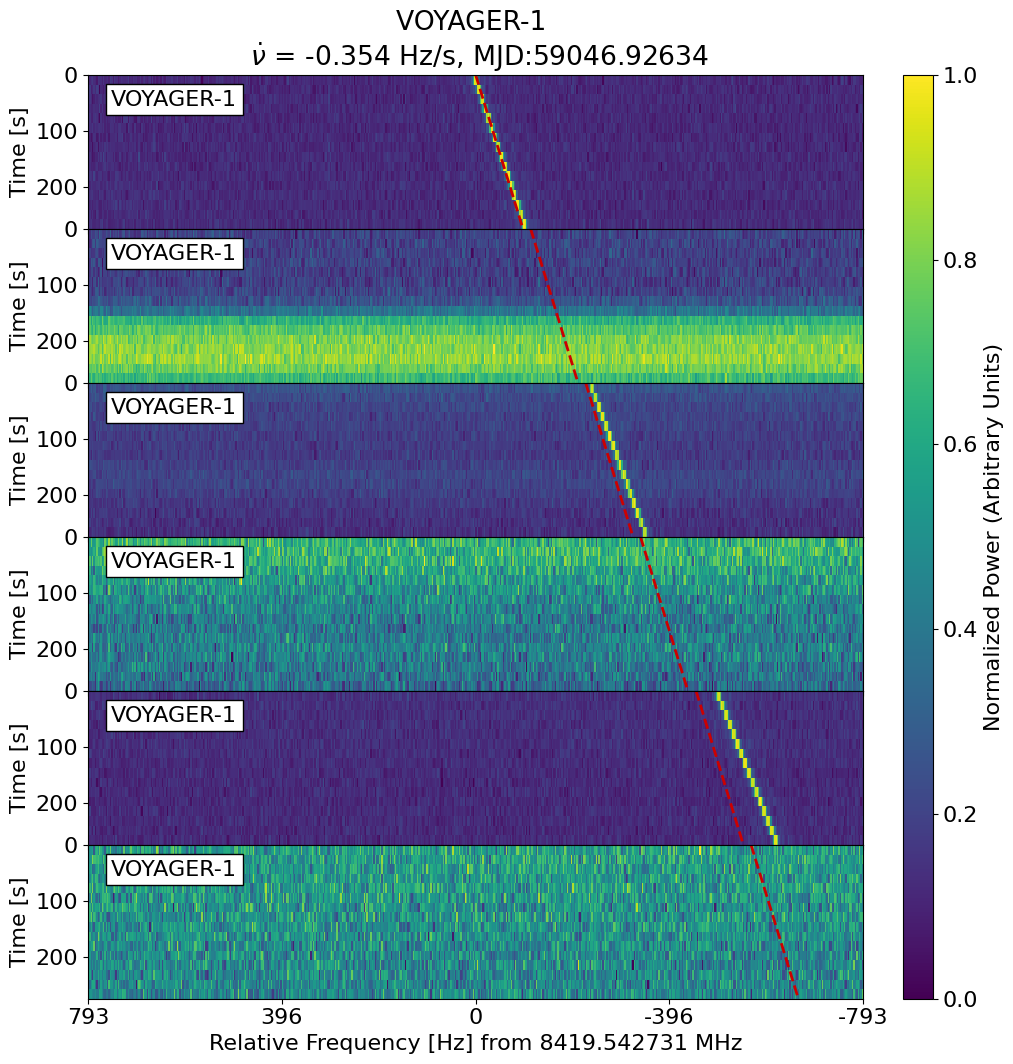

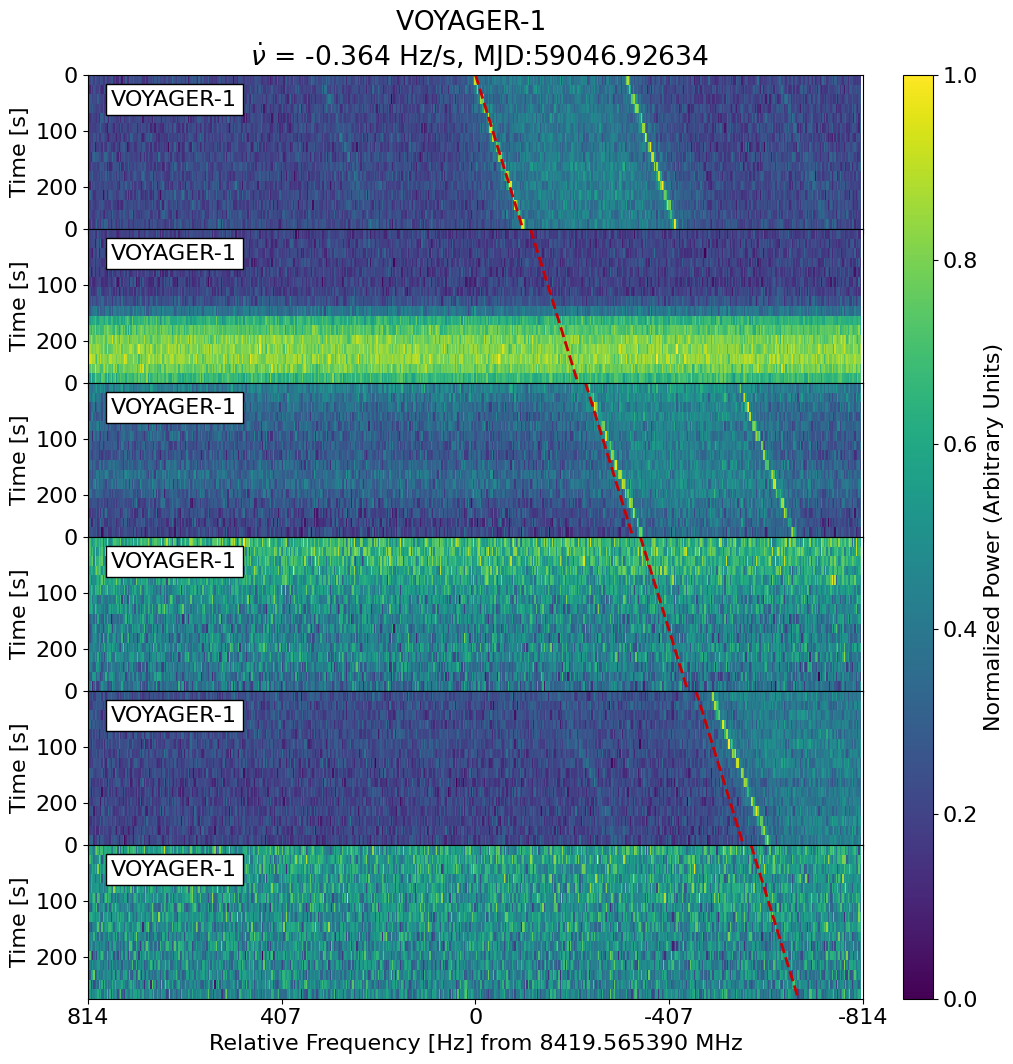

In [16]:
from IPython.display import Image, display

pnglist = sorted(glob.glob(DATADIR + '*.png'))
for pngfile in pnglist:
    display(Image(filename=pngfile))


All done!